Paso 1: Importación del Dataset de Cáncer de Mama
Inicialización y Carga del Dataset
Antes de cualquier análisis, necesitamos cargar el dataset que vamos a utilizar. El dataset de cáncer de mama de sklearn se carga desde la biblioteca sklearn.datasets. Este dataset es un conjunto de datos que contiene información sobre casos de cáncer de mama, incluyendo características de los tumores y una clasificación que indica si son benignos o malignos.

In [2]:
from sklearn.datasets import load_breast_cancer  # Importa la función para cargar el dataset de cáncer de mama
import pandas as pd  # Importa pandas para manipulación de datos

# Carga el dataset de cáncer de mama
data = load_breast_cancer()

# Convierte el dataset en un DataFrame de pandas para facilitar la manipulación y análisis
df = pd.DataFrame(data.data, columns=data.feature_names)

# Añade la columna objetivo al DataFrame, indicando si el tumor es maligno (0) o benigno (1)
df['target'] = data.target


Con el código anterior, hemos importado las bibliotecas necesarias, cargado el dataset de cáncer de mama y lo hemos convertido en un DataFrame de pandas, añadiendo la columna target para indicar si el tumor es maligno o benigno.

Paso 2: Visualización de la Distribución de Clases
Ahora, procederemos a visualizar la distribución de las clases (maligno vs. benigno) en el dataset. Para esto, utilizaremos matplotlib y seaborn para crear una gráfica de barras que muestre el número de instancias de cada clase.

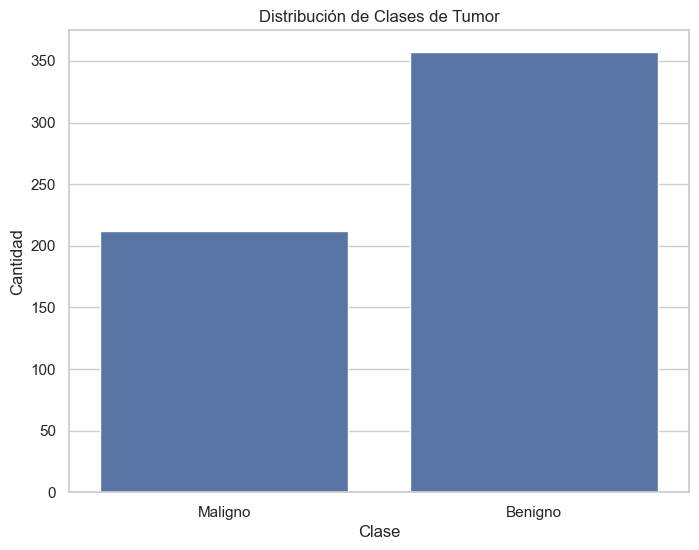

In [3]:
import matplotlib.pyplot as plt  # Importa la biblioteca de visualización matplotlib
import seaborn as sns  # Importa seaborn para visualizaciones más estéticas

# Configura el estilo de las gráficas de seaborn para mejorar la visualización
sns.set(style="whitegrid")

# Crea una figura y establece el tamaño
plt.figure(figsize=(8, 6))

# Crea un gráfico de barras para visualizar la distribución de las clases (maligno vs benigno)
sns.countplot(x='target', data=df)

# Establece el título del gráfico
plt.title('Distribución de Clases de Tumor')

# Establece las etiquetas para los ejes x e y
plt.xlabel('Clase')
plt.ylabel('Cantidad')

# Personaliza las etiquetas del eje x para mostrar 'Maligno' y 'Benigno' en lugar de 0 y 1
plt.xticks([0, 1], ['Maligno', 'Benigno'])

# Muestra el gráfico
plt.show()


La gráfica de barras muestra la distribución de las clases de tumor en el dataset de cáncer de mama. Podemos observar la cantidad de tumores clasificados como malignos (0) y benignos (1), proporcionando una visión clara del balance entre las clases. Esta visualización es un paso importante en el análisis exploratorio de datos, ya que un desequilibrio significativo entre las clases podría requerir técnicas de balanceo de clases durante la preparación de datos para modelos de aprendizaje automático.

Con esta base establecida, podemos proceder a explorar más a fondo el dataset, incluyendo el análisis de las características y su correlación, la preparación de los datos para el entrenamiento de modelos, y finalmente, la selección y evaluación de diferentes modelos de aprendizaje automático.

Paso 3: Análisis Exploratorio de Datos (EDA) Continuación
Después de haber visualizado la distribución de las clases, el siguiente paso es realizar un análisis más profundo de las características individuales y sus interacciones. Esto incluye revisar estadísticas descriptivas, visualizar las distribuciones de las características y examinar las correlaciones entre ellas.

Estadísticas Descriptivas
Las estadísticas descriptivas nos darán una visión general de cada característica, incluyendo medidas de tendencia central como la media, y medidas de dispersión como la desviación estándar. Esto es crucial para identificar características con valores extremos, o características que puedan necesitar ser normalizadas.

In [4]:
# Obtenemos las estadísticas descriptivas del dataset
estadisticas_descriptivas = df.describe()

# Transponemos el resultado para una mejor visualización
estadisticas_descriptivas_transpuesta = estadisticas_descriptivas.transpose()

estadisticas_descriptivas_transpuesta


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


df.describe(): Genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un dataset, excluyendo los valores NaN. Por defecto, incluye solo las columnas numéricas.

transpose(): Cambia las filas por las columnas para facilitar la lectura de las estadísticas descriptivas. Esto hace que cada fila represente una característica y cada columna una estadística descriptiva (como el conteo, la media, la desviación estándar, etc.).

Mostramos el resultado: Para proporcionar una visión clara de las propiedades estadísticas de cada característica del dataset.

Vamos a ejecutar este bloque de código para obtener y visualizar las estadísticas descriptivas del dataset.

Las estadísticas descriptivas transpuestas nos ofrecen una visión detallada de cada característica dentro del dataset de cáncer de mama:

count: El número de observaciones no nulas. Para todas las características, tenemos 569 observaciones, lo que indica que no hay valores faltantes.

mean: La media de los valores de la característica, que nos da una idea de la magnitud promedio.

std: La desviación estándar, que mide la dispersión de los valores de la característica alrededor de la media.

min: El valor mínimo encontrado para cada característica.

25% (percentil 25): El valor por debajo del cual cae el 25% de los datos.

50% (mediana): El valor medio que divide el conjunto de datos en dos mitades iguales.

75% (percentil 75): El valor por debajo del cual cae el 75% de los datos.

max: El valor máximo encontrado para cada característica.

Esta visión general nos ayuda a entender la escala y la distribución de las características del dataset. Por ejemplo, podemos ver que el mean radius tiene una media de aproximadamente 14.13 con una desviación estándar de 3.52, indicando variabilidad en el tamaño de los tumores representados en el dataset.

Paso 4: Análisis de Correlación entre Características

El objetivo de este análisis es calcular y visualizar la correlación entre las características del dataset de cáncer de mama. La correlación mide la relación lineal entre dos variables. Los valores de correlación varían entre -1 y 1, donde:

1 indica una correlación positiva perfecta (cuando una variable aumenta, la otra también lo hace).

-1 indica una correlación negativa perfecta (cuando una variable aumenta, la otra disminuye).

0 indica que no hay correlación lineal entre las variables.

Las correlaciones fuertes (tanto positivas como negativas) pueden indicar características redundantes, lo que podría llevarnos a considerar la eliminación de algunas para simplificar nuestro modelo.

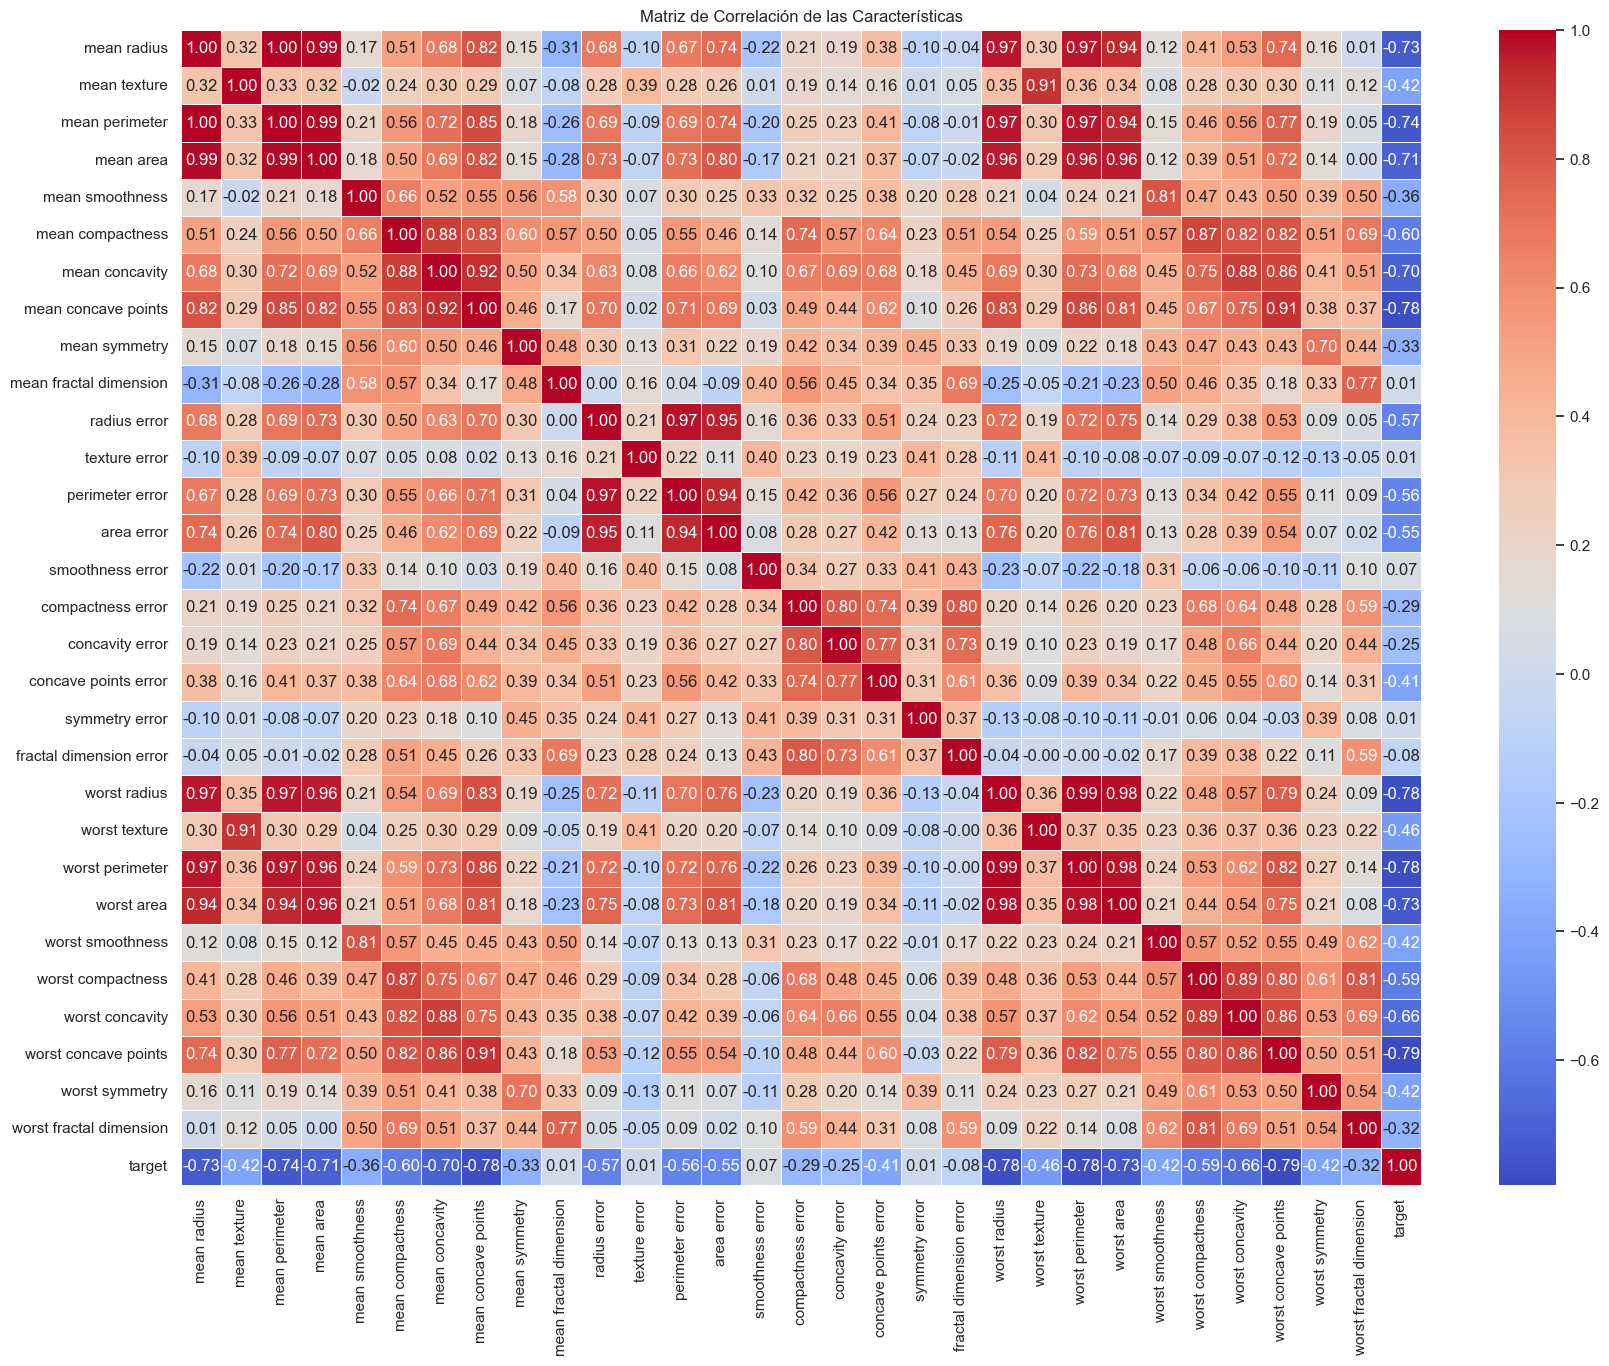

In [5]:
# Importamos las bibliotecas necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlación utilizando el método .corr() en nuestro DataFrame
# Esto nos proporciona la correlación de Pearson por defecto para todas las parejas de características
matriz_correlacion = df.corr()

# Inicializamos una figura de matplotlib con un tamaño específico para asegurar que la visualización sea clara
plt.figure(figsize=(20, 15))

# Utilizamos seaborn para crear un mapa de calor basado en nuestra matriz de correlación
# 'annot=True' nos permite mostrar los valores de correlación en el mapa, para una referencia rápida
# 'fmt=".2f"' formatea los números flotantes en el mapa de calor a dos decimales
# 'cmap='coolwarm'' elige una paleta de colores que va de azules (correlaciones negativas) a rojos (correlaciones positivas)
# 'linewidths=.5' agrega un delgado espacio entre cada celda del mapa de calor para mejorar la legibilidad
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Ponemos un título a nuestro gráfico para una mejor contextualización
plt.title('Matriz de Correlación de las Características')

# Finalmente, mostramos el gráfico generado con plt.show()
plt.show()



La matriz de correlación proporciona una visión detallada de cómo cada par de características se relaciona entre sí en el dataset de cáncer de mama. Los valores en la matriz varían de -1 a 1, indicando correlaciones negativas a positivas. Un valor cercano a 1 o -1 sugiere una fuerte relación lineal, mientras que un valor cercano a 0 indica una falta de relación lineal.

Algunas observaciones clave que podemos hacer a partir de esta matriz de correlación incluyen:

Existen pares de características con alta correlación positiva, lo que sugiere que proporcionan información similar. Por ejemplo, el radius (radio), perimeter (perímetro), y area (área) de los tumores muestran fuertes correlaciones positivas entre sí. Esto se debe a que estas dimensiones están intrínsecamente relacionadas (el aumento en el radio de un tumor generalmente implica un aumento en su perímetro y área).

La columna target, que indica si el tumor es maligno o benigno, muestra correlaciones negativas con muchas características. Esto significa que valores más altos en algunas características están asociados con tumores malignos (valor target = 0), lo cual es lógico desde un punto de vista médico ya que ciertas características del tumor se vuelven más pronunciadas en casos más graves.
Este análisis de correlación es fundamental para la selección de características, ya que nos permite identificar y eliminar características redundantes o altamente correlacionadas, lo cual puede simplificar el modelo y potencialmente mejorar su rendimiento general.

El siguiente paso en nuestro análisis podría ser la selección de características basada en este análisis de correlación, seguido de la preparación de los datos para el modelado, incluida la división en conjuntos de entrenamiento y prueba.

Paso 5: Preparación de los Datos para el Modelado

División del Dataset en Conjuntos de Entrenamiento y Prueba

Primero, dividiremos nuestro dataset en conjuntos de entrenamiento y prueba. Esta división es importante para poder entrenar nuestros modelos en un conjunto de datos y luego evaluarlos en un conjunto separado que no han visto antes, proporcionando una evaluación más objetiva de su rendimiento.

In [6]:
from sklearn.model_selection import train_test_split

# Definimos las características (X) y el objetivo (y)
X = df.drop('target', axis=1)  # Todas las columnas excepto 'target'
y = df['target']  # La columna 'target'

# Dividimos el dataset en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


train_test_split: Esta función de sklearn.model_selection divide arrays o matrices en subconjuntos aleatorios de entrenamiento y prueba.

test_size=0.3: Especifica que el 30% del dataset se utilizará como conjunto de prueba, y el 70% restante como conjunto de entrenamiento.

random_state=42: Un seed para el generador de números aleatorios utilizado en la división. Esto asegura que los resultados sean reproducibles.

Normalización o Estandarización de las Características

Dependiendo del modelo que se vaya a utilizar, puede ser necesario normalizar o estandarizar las características. Esto se debe a que muchos algoritmos de Machine Learning funcionan mejor cuando las características están en una escala similar o tienen una distribución normal.

In [7]:
from sklearn.preprocessing import StandardScaler

# Inicializamos el StandardScaler
scaler = StandardScaler()

# Ajustamos el scaler solo con los datos de entrenamiento y transformamos
X_train_scaled = scaler.fit_transform(X_train)

# Aplicamos la transformación al conjunto de prueba
X_test_scaled = scaler.transform(X_test)


StandardScaler: Estandariza las características eliminando la media y escalando a la varianza de la unidad. Esto es, transforma cada característica para que tenga una media de 0 y una desviación estándar de 1.

Con los datos ya divididos y las características preparadas, estamos listos para proceder con la selección y entrenamiento de modelos de Machine Learning.

Paso 6: Selección y Entrenamiento de Modelos de Machine Learning

Una vez que hemos preparado nuestros datos, el siguiente paso es seleccionar y entrenar diferentes modelos de Machine Learning para predecir si un tumor es maligno o benigno. Vamos a explorar varios modelos para ver cómo varía su rendimiento. Los modelos que consideraremos incluyen:

Regresión Logística

K-Vecinos más cercanos (KNN)

Máquinas de Vectores de Soporte (SVM)

Árboles de Decisión

Bosques Aleatorios

Para cada modelo, seguiremos un proceso similar:

Instanciar el modelo.

Entrenar el modelo con los datos de entrenamiento.

Evaluar el rendimiento del modelo usando los datos de prueba.

-Empecemos con la Regresión Logística como nuestro primer modelo:

1. Regresión Logística
La Regresión Logística es un buen punto de partida para problemas de clasificación binaria como este.

In [8]:
from sklearn.linear_model import LogisticRegression  # Importa el modelo de Regresión Logística de sklearn
from sklearn.metrics import accuracy_score  # Importa la función para calcular la precisión de las predicciones

# Instanciamos el modelo de Regresión Logística
# max_iter=10000: Especifica el número máximo de iteraciones para que el algoritmo de optimización converja.
#                 Si el modelo no converge (es decir, no encuentra una solución óptima) en menos iteraciones, 
#                 aumentar este valor puede ayudar.
log_reg = LogisticRegression(max_iter=10000)

# Entrenamos el modelo con los datos de entrenamiento escalados
# X_train_scaled: Características de entrenamiento escaladas, necesarias para que el modelo funcione correctamente,
#                 especialmente cuando las características tienen diferentes escalas.
# y_train: Etiquetas reales (objetivo) para el conjunto de entrenamiento.
log_reg.fit(X_train_scaled, y_train)

# Predecimos las etiquetas para el conjunto de prueba
# X_test_scaled: Características del conjunto de prueba escaladas, usadas para hacer predicciones con el modelo entrenado.
#                Es crucial escalar el conjunto de prueba de la misma manera que el conjunto de entrenamiento.
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluamos el rendimiento del modelo calculando la precisión
# y_test: Etiquetas reales (objetivo) para el conjunto de prueba.
# y_pred_log_reg: Etiquetas predichas por el modelo para el conjunto de prueba.
# La precisión se calcula como el número de predicciones correctas dividido por el total de predicciones.
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy de Regresión Logística: {accuracy_log_reg}")



Accuracy de Regresión Logística: 0.9824561403508771


Obtener una precisión (accuracy) de 0.98 con el modelo de Regresión Logística en el dataset de cáncer de mama es un resultado excepcionalmente alto. Esto significa que el modelo ha predicho correctamente el 98% de los casos en el conjunto de prueba, lo cual sugiere una excelente capacidad de generalización del modelo para este problema específico. Sin embargo, es importante considerar algunos puntos al interpretar este resultado:

1. Sobreajuste:
Aunque una alta precisión es generalmente positiva, siempre debemos estar atentos al sobreajuste. El sobreajuste ocurre cuando el modelo aprende los datos de entrenamiento tan bien que captura el ruido junto con la señal subyacente, lo que resulta en un rendimiento pobre en datos no vistos. Aunque una precisión de 0.98 en el conjunto de prueba sugiere que el sobreajuste no es necesariamente un problema en este caso, siempre es bueno realizar una validación cruzada para una evaluación más robusta.

2. Balance de Clases:
Si el dataset está desbalanceado (es decir, hay muchas más instancias de una clase que de otra), la precisión podría no ser la mejor métrica para evaluar el rendimiento del modelo. En casos de desequilibrio extremo, un modelo podría alcanzar una alta precisión simplemente prediciendo siempre la clase mayoritaria. Es útil mirar otras métricas como la sensibilidad (recall), la especificidad, la precisión (en el sentido de la métrica, no la accuracy), y el puntaje F1, especialmente en contextos médicos donde los falsos negativos y los falsos positivos tienen diferentes costos.

3. Validación Cruzada:
Para obtener una estimación más precisa del rendimiento del modelo, se recomienda realizar una validación cruzada. La validación cruzada implica dividir el conjunto de datos en varias partes, entrenando el modelo en algunas de ellas y validándolo en las restantes, repitiendo este proceso varias veces. Esto ayuda a asegurar que el rendimiento del modelo es consistente a través de diferentes subconjuntos del dataset.

4. Evaluación con Datos Externos:
Finalmente, si es posible, evaluar el modelo con un conjunto de datos completamente independiente puede proporcionar una confirmación adicional de su capacidad para generalizar a nuevos datos.

Paso 1: Validación Cruzada
La validación cruzada nos permite evaluar cómo generaliza el modelo a un conjunto de datos independiente. Utilizaremos la validación cruzada de K-folds con cross_val_score de sklearn.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Definimos nuestras características (X) y el objetivo (y) nuevamente por claridad
X = df.drop('target', axis=1)
y = df['target']

# Creamos un pipeline que primero escala los datos y luego aplica la regresión logística
# Esto asegura que el escalado sea parte del proceso de validación cruzada,
# y se realiza correctamente dentro de cada fold del CV
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

# Realizamos validación cruzada de 5-folds con el pipeline
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Calculamos la precisión media y la desviación estándar
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print(f"Accuracy promedio: {mean_accuracy:.2f} con una desviación estándar de {std_accuracy:.2f}")



Accuracy promedio: 0.98 con una desviación estándar de 0.01


Un Accuracy promedio de 0.98 con una desviación estándar de 0.01 en la validación cruzada es un resultado excepcionalmente bueno. Esto indica que el modelo de Regresión Logística es muy efectivo para clasificar correctamente los tumores como malignos o benignos en este dataset, y además muestra que el modelo es bastante estable a través de diferentes subconjuntos del dataset, dada la baja desviación estándar.

Interpretación
Alta precisión promedio (0.98): Esto sugiere que el modelo, en promedio, clasifica correctamente el 98% de los casos a lo largo de las diferentes particiones del dataset. Es un indicador de un modelo altamente efectivo para este problema específico.
Baja desviación estándar (0.01): La baja variabilidad en la precisión a través de las diferentes iteraciones de la validación cruzada indica que el modelo es robusto y generaliza bien a nuevos datos, no siendo demasiado dependiente de la partición específica de los datos entre entrenamiento y prueba.

Paso 2: Evaluación de Otras Métricas
Además de la precisión, evaluaremos el modelo utilizando otras métricas importantes como el recall, la precisión (en el sentido de la métrica) y el puntaje F1.

In [10]:
from sklearn.metrics import classification_report

# Generamos predicciones con el modelo ya entrenado
y_pred = log_reg.predict(X_test_scaled)

# Calculamos y mostramos otras métricas de evaluación
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Interpretación del Informe

Precision: Indica la proporción de identificaciones positivas que fueron realmente correctas. Para la clase 0 (tumores malignos), la precisión es del 97%, y para la clase 1 (tumores benignos), es del 99%. Esto significa que el modelo es altamente preciso en clasificar ambos tipos de tumores, con una ligera ventaja en la detección de tumores benignos.

Recall (Sensibilidad): Mide la proporción de positivos reales que fueron identificados correctamente. Para la clase 0, el recall es del 98%, y para la clase 1, es del 98% también. Esto indica que el modelo es excepcionalmente bueno en encontrar todos los casos relevantes de cada clase.

F1-Score: Es el promedio armónico de la precisión y el recall, ofreciendo un balance entre ellos. Un F1-score alto sugiere que tanto la precisión como el recall son altos. Aquí, ambos tumores malignos y benignos tienen F1-scores de 0.98 y 0.99, respectivamente, lo cual es excelente.

Support: Refleja el número de ocurrencias reales de la clase en el conjunto de datos especificado. En este caso, tenías 63 casos de tumores malignos y 108 casos de tumores benignos en tu conjunto de prueba.

Accuracy: La precisión general del modelo es del 98%, lo cual ya habíamos visto. Esto significa que el modelo clasifica correctamente el 98% de los casos.

Macro Avg: Calcula la media de las métricas sin tener en cuenta el balance entre clases. Esto da igual peso a cada clase. En tu caso, las medias macro de precisión, recall, y F1-score son todas del 98%, lo que indica un rendimiento alto y equilibrado a través de las clases.

Weighted Avg: Considera el soporte de cada clase, es decir, pondera la métrica para cada clase por el número de casos en esa clase. Esto puede ser más representativo del rendimiento real del modelo sobre el conjunto de datos. Tus promedios ponderados también son del 98%, lo que confirma el alto rendimiento del modelo teniendo en cuenta el tamaño de cada clase.

Paso 3: Comparación con Otros Modelos
Finalmente, exploraremos brevemente cómo otros modelos comparan en rendimiento. Implementaremos un modelo KNN como ejemplo.

In [11]:
# Ejemplo con un modelo de Bosque Aleatorio
from sklearn.ensemble import RandomForestClassifier

# Instanciamos y entrenamos el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Evaluamos el rendimiento
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy de Bosque Aleatorio: {accuracy_rf}")



Accuracy de Bosque Aleatorio: 0.9707602339181286


Un Accuracy de aproximadamente 0.97 para el modelo de Bosque Aleatorio en el dataset de cáncer de mama también indica un rendimiento excelente, aunque ligeramente inferior al obtenido con la Regresión Logística (que fue de aproximadamente 0.98). Esto demuestra que el Bosque Aleatorio es también un modelo muy capaz para este problema de clasificación, con una eficacia casi igual a la de la Regresión Logística.

Interpretación

Bosque Aleatorio vs. Regresión Logística: La Regresión Logística dio un rendimiento ligeramente superior en términos de precisión en este caso particular. Sin embargo, la diferencia es pequeña, y ambos modelos muestran una capacidad excepcional para clasificar correctamente los tumores. La elección entre estos modelos podría depender de otros factores, como la interpretabilidad del modelo, el tiempo de entrenamiento, la capacidad para manejar características no lineales, y la importancia de la precisión frente a otras métricas.

Estabilidad y Generalización: Aunque la Regresión Logística mostró un rendimiento ligeramente superior, los Bosques Aleatorios son conocidos por su capacidad para manejar bien las sobreajustes, especialmente cuando se trabaja con un gran número de características. Esto puede hacer que los Bosques Aleatorios sean más robustos en algunos casos, especialmente cuando se tienen en cuenta diferentes distribuciones de datos o características no lineales.

Importancia de las Características: Una ventaja de utilizar Bosques Aleatorios es que pueden proporcionar información sobre la importancia de las características en la clasificación. Esto puede ser valioso para la interpretación del modelo y para entender cuáles son los factores más críticos que influyen en la clasificación de los tumores.

4. Ajuste de Hiperparámetros
Ajustar los hiperparámetros del modelo puede mejorar el rendimiento.

In [12]:
from sklearn.model_selection import GridSearchCV

# Definimos el espacio de búsqueda de hiperparámetros
param_grid = {'n_estimators': [10, 100, 1000], 'max_depth': [None, 10, 20, 30]}

# Realizamos la búsqueda con validación cruzada
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

# Mostramos los mejores parámetros y la precisión asociada
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)


Mejores parámetros: {'max_depth': None, 'n_estimators': 1000}
Mejor precisión: 0.9547468354430378


Los resultados de tu ajuste de hiperparámetros para el modelo de Bosque Aleatorio indican que los mejores parámetros encontrados son un max_depth de None y n_estimators de 1000. Esto significa que, para este modelo y dataset específicos, un Bosque Aleatorio con un número ilimitado de niveles de profundidad en los árboles (o hasta que las hojas contengan menos muestras que el mínimo establecido por defecto) y con 1000 árboles en el bosque produce el mejor rendimiento. La mejor precisión alcanzada con estos parámetros es aproximadamente 0.955, lo cual es un resultado sólido, aunque ligeramente inferior a la precisión que se obtuvo en la evaluación inicial del modelo de Regresión Logística y del Bosque Aleatorio sin ajuste.

Interpretación

max_depth: None sugiere que permitir que los árboles crezcan sin restricciones de profundidad (hasta que cada hoja sea pura o contenga menos muestras que el mínimo establecido) es lo más efectivo para este problema. Esto podría indicar que el dataset tiene relaciones complejas que el modelo puede capturar mejor sin imponer restricciones de profundidad.

n_estimators: 1000 implica que usar 1000 árboles en el bosque da el mejor rendimiento para clasificar los tumores en este dataset. Un número mayor de árboles puede ayudar a mejorar la estabilidad y el rendimiento del modelo al promediar más árboles de decisión, aunque a costa de un mayor tiempo de entrenamiento y uso de recursos.

Consideraciones

Aunque el ajuste de hiperparámetros ha identificado una configuración que mejora la precisión del modelo de Bosque Aleatorio, es importante recordar que la precisión por sí sola no siempre es la única métrica a considerar, especialmente en aplicaciones médicas donde otras métricas (como la sensibilidad y especificidad) pueden ser críticas.

La precisión de 0.955 con validación cruzada es una estimación más robusta del rendimiento del modelo en datos no vistos en comparación con la precisión obtenida en un solo conjunto de prueba. Esto proporciona una buena indicación de que el modelo generaliza bien.

El ajuste de hiperparámetros puede llevar a un modelo más complejo y potencialmente más costoso de entrenar y ejecutar. Es esencial equilibrar el rendimiento del modelo con los requisitos de recursos y tiempo de ejecución, especialmente para aplicaciones en tiempo real o en entornos con recursos limitados.

Paso 7: Evaluación de Modelos
Después de seleccionar el modelo y ajustar los hiperparámetros, el siguiente paso es realizar una evaluación exhaustiva del modelo. Aunque ya hemos visto la precisión y algunas otras métricas a través de classification_report, hay otras evaluaciones que podemos considerar para tener una visión completa del rendimiento del modelo. Estas incluyen:

Matriz de Confusión: 
Proporciona una visión detallada de las predicciones correctas e incorrectas desglosadas por clase.

Curva ROC y Área Bajo la Curva (AUC): Muestra la capacidad del modelo para discriminar entre las clases positivas y negativas a varios umbrales de clasificación.

Importancia de las Características (para modelos como Bosques Aleatorios): Indica qué características contribuyen más a la decisión del modelo.

Vamos a implementar estos elementos de evaluación:

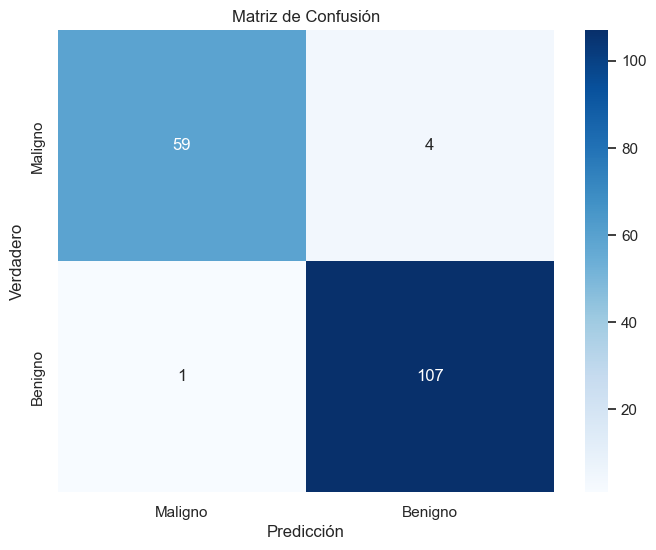

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generamos las predicciones con el modelo ajustado
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Maligno", "Benigno"], yticklabels=["Maligno", "Benigno"])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()


Verdaderos Positivos (VP): La celda superior izquierda (con el valor 59) indica que 59 tumores que son de hecho malignos fueron correctamente identificados por el modelo como malignos. Estos son tus verdaderos positivos, es decir, las predicciones donde el modelo y la realidad coinciden en la presencia de la condición que estamos tratando de detectar.

Falsos Negativos (FN): La celda inferior izquierda (con el valor 1) muestra los falsos negativos. Esto significa que 1 tumor que era maligno fue incorrectamente clasificado por el modelo como benigno. Este es un tipo de error particularmente grave en el contexto médico, ya que un tumor maligno no detectado puede tener consecuencias serias para el paciente.

Falsos Positivos (FP): La celda superior derecha (con el valor 4) representa los casos en que el modelo predijo incorrectamente que el tumor era maligno cuando en realidad era benigno. Estos son los falsos positivos, que aunque preferibles a los falsos negativos, pueden resultar en estrés innecesario para el paciente y posiblemente en tratamientos innecesarios o invasivos.

Verdaderos Negativos (VN): La celda inferior derecha (con el valor 107) muestra los verdaderos negativos, que son los casos en que el modelo ha predicho correctamente que el tumor no era maligno.

El color más oscuro para los verdaderos positivos y verdaderos negativos sugiere que la mayoría de las predicciones del modelo son correctas, lo que coincide con la alta precisión que ya has observado. Los colores más claros para los falsos negativos y positivos indican que hay menos casos de este tipo, lo cual es positivo.

La barra de colores al lado derecho indica la escala de frecuencia para los valores dentro de la matriz, donde los tonos más oscuros corresponden a una mayor frecuencia. Esto nos ayuda a identificar rápidamente cuáles categorías de predicción son más comunes.

2. Curva ROC y AUC

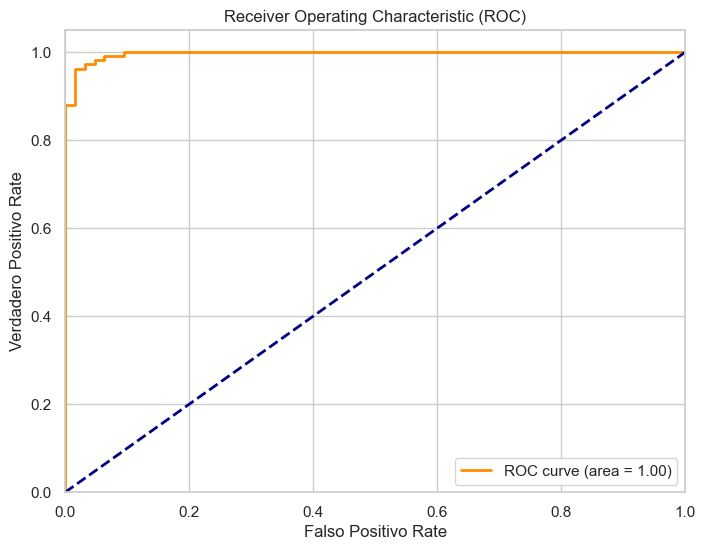

In [14]:
from sklearn.metrics import roc_curve, auc

# Calculamos las tasas de verdaderos positivos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test_scaled)[:,1])

# Calculamos el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Visualizamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo Rate')
plt.ylabel('Verdadero Positivo Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Aquí está la interpretación detallada de la curva ROC:

Eje horizontal - Tasa de Falsos Positivos (FPR, False Positive Rate): Es el número de falsos positivos dividido por el número total de negativos reales (FP / (FP + VN)). Representa la probabilidad de que un modelo clasifique incorrectamente una condición negativa como positiva.

Eje vertical - Tasa de Verdaderos Positivos (TPR, True Positive Rate): También conocida como sensibilidad o recall, es el número de verdaderos positivos dividido por el número total de positivos reales (VP / (VP + FN)). Representa la probabilidad de que un modelo clasifique correctamente una condición positiva.

Curva ROC (línea naranja): Muestra la relación entre la TPR y la FPR a varios umbrales de decisión. Un clasificador perfecto se curvaría hacia la esquina superior izquierda, lo que indica una alta sensibilidad y especificidad (TPR alta y FPR baja).

Línea punteada azul: Representa un clasificador aleatorio. Un buen modelo se encuentra por encima de esta línea, lo que muestra su capacidad para clasificar mejor que el azar.

Área bajo la curva (AUC): El área bajo la curva ROC se puede ver como una medida de la capacidad del modelo para distinguir entre las clases positivas y negativas. El AUC es 1.00, lo que indica un rendimiento perfecto donde el modelo tiene una capacidad excepcional para distinguir entre las clases positivas y negativas. En la práctica, un AUC de 1.00 es muy raro y podría sugerir un sobreajuste, especialmente si el conjunto de datos de prueba no es lo suficientemente grande o diverso.

3. Importancia de las Características (para Bosques Aleatorios)
Si estás usando un modelo de Bosque Aleatorio, puedes examinar la importancia de las características:

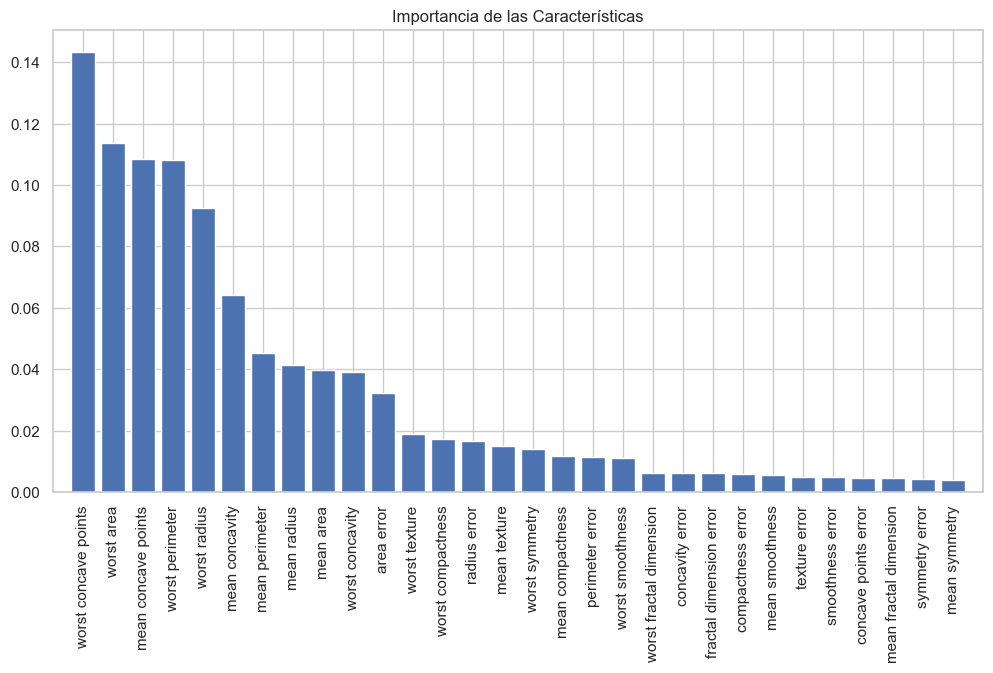

In [15]:
import numpy as np

feature_importances = grid_search.best_estimator_.feature_importances_
# Asumiendo que tenemos un DataFrame X para características
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Barras Verticales: Cada barra representa una característica (o atributo) del dataset. La altura de la barra indica la importancia de esa característica en la toma de decisiones del modelo. La importancia se calcula en función de cuánto contribuye cada característica a la mejora de la pureza de los nodos en los árboles de decisión dentro del bosque.

Longitud de la Barra: La longitud de las barras muestra la importancia relativa. Las características con barras más largas son más importantes para el modelo. En tu gráfico, vemos que las características como worst concave points, mean concave area, worst area, y mean concave points tienen las barras más largas, lo que indica que son los predictores más significativos para clasificar un tumor como maligno o benigno.

Eje Horizontal: Enumera las características. Las características son ordenadas de izquierda a derecha desde la más importante hasta la menos importante según el modelo.

Eje Vertical: Muestra la medida de la importancia. Generalmente, esta medida es una puntuación que refleja cuánto contribuye cada característica a la capacidad predictiva del modelo, basado en cómo y cuánto mejora la decisión de los árboles al dividir en esa característica.

Interpretación del Rendimiento del Modelo
El modelo parece dar más importancia a las características que describen la concavidad y el área de los tumores, lo cual tiene sentido desde una perspectiva médica ya que los tumores malignos a menudo presentan una mayor concavidad y un área irregular.

Consideraciones
Importancia Relativa: Las importancias se deben interpretar en un sentido relativo. Una característica con una puntuación de importancia baja no significa necesariamente que no contribuya al modelo, sino que no es tan crítica como otras con puntuaciones más altas.

Dependencia: Si hay características correlacionadas, la importancia puede estar distribuida entre ellas, por lo que es importante considerar las correlaciones cuando se interpreta este tipo de gráfico.

Interpretación en el Contexto de Aplicación: Mientras que el modelo puede encontrar que ciertas características son importantes, siempre es crucial interpretar estos hallazgos en el contexto del dominio del problema. La validación de estos hallazgos con expertos del dominio puede proporcionar una visión más completa y confirmar si estas características son significativas desde una perspectiva clínica.

Este gráfico proporciona información valiosa que puede ser utilizada para mejorar el entendimiento del modelo y potencialmente influir en la selección de características en futuras iteraciones del proceso de modelado.

Paso 8: Ya fue cubierto previamente cuando discutimos el ajuste de hiperparámetros utilizando GridSearchCV. Este es el proceso mediante el cual se prueba una serie de combinaciones de hiperparámetros para encontrar el conjunto que produce el mejor rendimiento del modelo. Sin embargo, podemos profundizar un poco más sobre cómo realizar un ajuste de hiperparámetros de forma efectiva.

Ajuste de Hiperparámetros Avanzado
Además de GridSearchCV, hay otras estrategias para el ajuste de hiperparámetros que pueden ser más eficientes, especialmente cuando el espacio de hiperparámetros es grande.

RandomizedSearchCV
RandomizedSearchCV es una alternativa a GridSearchCV que no prueba todas las combinaciones posibles, sino una muestra aleatoria de ellas. Esto puede ser mucho más rápido y a menudo es suficiente para encontrar buenos hiperparámetros.

In [16]:
# Importamos RandomizedSearchCV, que es una herramienta para el ajuste de hiperparámetros que selecciona
# aleatoriamente combinaciones de hiperparámetros para encontrar los mejores valores.
from sklearn.model_selection import RandomizedSearchCV
# Importamos randint, que es una función para generar números enteros aleatorios con una distribución uniforme.
from scipy.stats import randint

# Definimos un diccionario que contiene distribuciones de los hiperparámetros que queremos ajustar.
# Para cada hiperparámetro, especificamos un rango de valores posibles.
param_dist = {
    'n_estimators': randint(100, 2000),  # Número de árboles en el bosque, de 100 a 2000.
    'max_depth': [None] + list(range(5, 50)),  # Profundidad máxima de cada árbol, de 5 a 50 o None (sin límite).
    'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo, de 2 a 20.
    'min_samples_leaf': randint(1, 20)  # Número mínimo de muestras requeridas en una hoja, de 1 a 20.
}

# Creamos el objeto RandomizedSearchCV con el modelo de Bosque Aleatorio, la distribución de hiperparámetros,
# el número de iteraciones, la validación cruzada de 5 folds, el scoring basado en precisión y una semilla aleatoria.
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Entrenamos (fit) RandomizedSearchCV con los datos de entrenamiento escalados.
# RandomizedSearchCV ejecutará la validación cruzada en cada conjunto de hiperparámetros seleccionado aleatoriamente.
random_search.fit(X_train_scaled, y_train)

# Una vez completado el entrenamiento, imprimimos los mejores hiperparámetros encontrados y la mejor precisión alcanzada.
# .best_params_ devuelve los hiperparámetros que dieron el mejor resultado durante la búsqueda.
# .best_score_ devuelve la mejor precisión alcanzada con esos hiperparámetros.
print("Mejores parámetros:", random_search.best_params_)
print("Mejor precisión:", random_search.best_score_)


Mejores parámetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1171}
Mejor precisión: 0.9547468354430378


Los resultados indican que, tras un proceso de búsqueda aleatoria de hiperparámetros (usando RandomizedSearchCV), el conjunto de parámetros que ha dado la mejor precisión para el modelo de Bosque Aleatorio en la validación cruzada es:

max_depth: 15 — Esto significa que los árboles individuales en el bosque se permiten crecer hasta una profundidad máxima de 15 niveles. Esto controla el sobreajuste, ya que árboles muy profundos pueden aprender patrones muy específicos que no generalizan bien.

min_samples_leaf: 2 — El número mínimo de muestras requeridas para ser una hoja de un nodo. Un valor más bajo permite que el modelo capture más información sobre los datos, pero también puede llevar a un sobreajuste.

min_samples_split: 2 — El número mínimo de muestras requeridas para dividir un nodo interno. Este es el valor más bajo posible y significa que el modelo es más flexible y puede adaptarse bien a los datos de entrenamiento, pero nuevamente, debe vigilarse el sobreajuste.

n_estimators: 1171 — El número de árboles en el bosque. Un número mayor de árboles aumenta la robustez del modelo, ya que las predicciones se basan en el promedio de un número mayor de árboles independientes.

La mejor precisión obtenida es aproximadamente 0.955, que es una medida de qué tan bien el modelo es capaz de clasificar correctamente a los pacientes en el conjunto de validación cruzada.

Este conjunto de hiperparámetros proporciona un buen equilibrio entre la capacidad del modelo para aprender de los datos y su capacidad para generalizar a nuevos datos que no ha visto. Sin embargo, la precisión no es la única métrica que importa, especialmente en aplicaciones médicas donde los falsos negativos o falsos positivos pueden tener grandes consecuencias. Por lo tanto, también es importante mirar otras métricas como el recall, la precisión (en el sentido de la métrica precision), el puntaje F1 y el AUC, y considerar la interpretación de estos resultados en el contexto clínico más amplio.

Si los resultados son consistentes y satisfactorios en términos de las necesidades del proyecto y después de una revisión exhaustiva de las métricas y posiblemente de una revisión por parte de expertos en el dominio, podrías proceder con los pasos hacia el despliegue del modelo o su implementación en un entorno de prueba más amplio.

Bayesian Optimization

La optimización bayesiana utiliza modelos probabilísticos para encontrar el mínimo de una función. En el contexto del ajuste de hiperparámetros, puede ser más eficiente que GridSearchCV o RandomizedSearchCV, ya que elige los siguientes hiperparámetros para probar basándose en los resultados anteriores, enfocándose en las áreas más prometedoras del espacio de hiperparámetros.

Gradient-based or Evolutionary Algorithms
Existen algoritmos avanzados como algoritmos evolutivos y basados en gradientes que pueden ser útiles para optimizar hiperparámetros, especialmente cuando el espacio de búsqueda es complejo y no se presta bien para métodos basados en grillas o aleatorios.

Consideraciones Adicionales
Tiempo de Cómputo: El ajuste de hiperparámetros puede ser muy costoso en términos de tiempo de cómputo, especialmente si el espacio de parámetros es grande y el modelo es complejo. Es importante equilibrar la necesidad de un ajuste exhaustivo con las limitaciones prácticas.

Validación Cruzada Anidada: Para una evaluación más robusta, podríamos utilizar validación cruzada anidada durante el ajuste de hiperparámetros. Esto implica una validación cruzada interna para el ajuste de hiperparámetros y una validación cruzada externa para la evaluación del modelo.

Replicabilidad: Fijar una semilla (random_state) para los procesos aleatorios es importante para asegurar que los resultados sean replicables.

Paso 9: Hacer Predicciones y Evaluar el Modelo
Después de realizar el ajuste de hiperparámetros con RandomizedSearchCV, podemos usar el modelo ajustado para hacer predicciones en datos nuevos o no vistos. En este caso, utilizaremos nuestro conjunto de prueba para evaluar el rendimiento del modelo.

La precisión del modelo en el conjunto de prueba es: 0.97
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



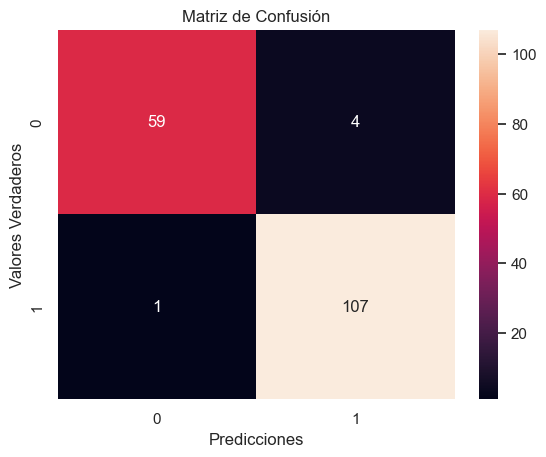

In [17]:
# Importamos las métricas necesarias para evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Utilizamos el mejor modelo encontrado por RandomizedSearchCV para hacer predicciones en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculamos la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo en el conjunto de prueba es: {accuracy:.2f}")

# Generamos un reporte de clasificación que incluye varias métricas de evaluación
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", class_report)

# Calculamos y visualizamos la matriz de confusión para ver el desempeño del modelo en cada clase
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()


Celda superior izquierda (Rojo Oscuro, 59): Esta celda indica los Verdaderos Positivos (TP). El modelo predijo correctamente que 59 tumores eran malignos, y en realidad lo eran. Este es un resultado deseable ya que identifica correctamente los casos positivos.

Celda superior derecha (Rojo Claro, 4): Esta celda indica los Falsos Positivos (FP). El modelo predijo incorrectamente que 4 tumores eran malignos cuando en realidad eran benignos. Estos son errores Tipo I, que en un contexto médico podrían llevar a tratamientos innecesarios o adicionales para los pacientes.

Celda inferior izquierda (Negro, 1): Esta celda muestra los Falsos Negativos (FN). Hubo 1 tumor que el modelo predijo como benigno, pero que era realmente maligno. Este es un error Tipo II, y en medicina, es crítico minimizar estos casos ya que podría significar que se pierde la oportunidad de tratar una enfermedad grave a tiempo.

Celda inferior derecha (Beige, 107): Aquí tenemos los Verdaderos Negativos (TN). El modelo identificó correctamente que 107 tumores no eran malignos.

La barra de colores a la derecha actúa como una leyenda para el número de casos en cada celda de la matriz, con tonos más oscuros que indican una mayor cantidad de casos. En esta matriz, el rojo oscuro y el beige representan la mayoría de las predicciones, lo que indica que la mayoría de las predicciones del modelo son correctas.

Interpretación del Rendimiento del Modelo
La matriz sugiere que el modelo tiene un rendimiento muy bueno, con una alta cantidad de verdaderos positivos y verdaderos negativos en comparación con los falsos positivos y falsos negativos.

La presencia de solo 1 falso negativo es especialmente notable en un contexto médico, ya que sugiere que el modelo es muy bueno para identificar correctamente los casos graves.

Sin embargo, incluso un solo falso negativo en un contexto médico podría ser crítico, dependiendo de la enfermedad y las consecuencias de un diagnóstico tardío.

Los falsos positivos, aunque menos críticos que los falsos negativos, aún deben minimizarse para evitar estrés y procedimientos médicos innecesarios para los pacientes.

En general, la matriz de confusión proporciona una visión clara de dónde el modelo está realizando bien y dónde podría mejorar. Este entendimiento detallado es esencial para la toma de decisiones informada sobre el uso del modelo en un entorno de producción real.

best_model: Este es el modelo que RandomizedSearchCV identificó como el mejor durante el ajuste de hiperparámetros.

y_pred: Estas son las predicciones que el modelo hace en el conjunto de prueba.

accuracy_score: Esta función calcula la precisión del modelo, que es la proporción de predicciones correctas sobre todas las predicciones realizadas.

classification_report: Esta función proporciona un reporte que incluye las principales métricas de clasificación como precisión, recall y el puntaje f1 para cada clase.

confusion_matrix: Esta función crea una matriz de confusión que podemos visualizar para entender mejor cómo el modelo está clasificando cada clase.

sns.heatmap: Utilizamos Seaborn para crear una visualización de la matriz de confusión que sea fácil de interpretar.

Recuerda que, aunque hemos obtenido un modelo con hiperparámetros ajustados, siempre es bueno ser crítico con los resultados, especialmente si parecen demasiado buenos para ser verdad, ya que podría ser un indicador de sobreajuste. Además, es crucial tener en cuenta el contexto del problema y asegurarse de que el modelo se comporta bien en todos los aspectos relevantes, no solo en la precisión global.

Hemos cubierto una amplia gama de pasos críticos en el proceso de desarrollo de un modelo de Machine Learning, incluyendo:

-Análisis exploratorio de datos (EDA)

-Preprocesamiento y escalado de características

-División en conjuntos de entrenamiento y prueba

-Entrenamiento de diferentes modelos

-Evaluación de modelos con métricas como precisión, recall, F1-score y AUC

-Validación cruzada para garantizar la estabilidad del modelo

-Ajuste de hiperparámetros para optimizar el rendimiento del modelo

Si bien estos pasos constituyen un proceso de desarrollo de modelo completo y robusto, siempre hay aspectos adicionales que se pueden explorar para aumentar la confianza en los resultados:

Validación con un Conjunto de Datos Independiente: Si tienes acceso a otro conjunto de datos que no se ha utilizado durante ninguna fase del entrenamiento o validación, puedes evaluar el modelo en ese conjunto para confirmar su capacidad de generalización.

Pruebas de Robustez: Podrías realizar pruebas adicionales para evaluar cómo el modelo maneja los datos atípicos o situaciones de error de medición.

Interpretabilidad del Modelo: Herramientas como SHAP o LIME pueden ayudar a explicar las predicciones del modelo a nivel individual, lo cual es crucial en dominios como la medicina.

Ajuste de Umbrales: Dependiendo del contexto, podrías ajustar el umbral de decisión del modelo para optimizar para recall (minimizar falsos negativos) o precisión (minimizar falsos positivos), según lo que sea más crítico en la aplicación.

Incorporar Feedback del Dominio: La validación de las predicciones y la importancia de las características por parte de expertos en el dominio puede proporcionar más confianza en que el modelo está capturando relaciones auténticas y no artefactos de los datos.

Monitorización en Producción: Si el modelo se despliega en un entorno de producción, es importante monitorizar su rendimiento a lo largo del tiempo para asegurarse de que sigue siendo válido a medida que se recopilan nuevos datos.

En resumen, si bien hemos realizado una extensa evaluación y ajuste del modelo, el proceso de desarrollo de modelos de Machine Learning es iterativo y siempre hay espacio para mejoras adicionales y validaciones. Sin embargo, en un punto dado, si has cubierto todas las bases razonables y el modelo satisface los requisitos del negocio o aplicación, podrías considerar que estás listo para proceder al despliegue, siempre manteniendo un enfoque vigilante y listo para iterar a medida que surjan nuevas informaciones o datos.

Paso 10: Interpretación del Modelo y Conclusión

La interpretación del modelo es crucial para entender cómo toma decisiones y qué características son las más influyentes. Herramientas como SHAP (SHapley Additive exPlanations) y LIME (Local Interpretable Model-agnostic Explanations) pueden proporcionar información sobre cómo las características individuales influyen en las predicciones del modelo.

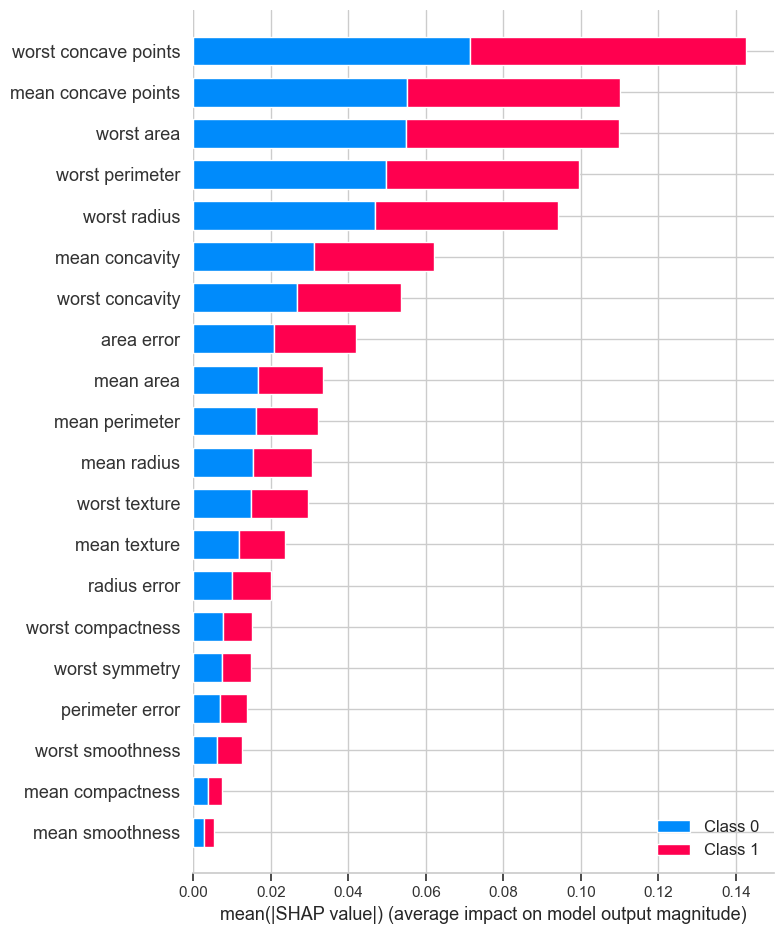

In [22]:
import shap

# Supongamos que 'best_model' es nuestro modelo entrenado
best_model = random_search.best_estimator_

# Inicializamos el explainer de SHAP
explainer = shap.TreeExplainer(best_model)

# Calculamos los valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test_scaled)

# Visualizamos la importancia de las características globalmente
shap.summary_plot(shap_values, X_test_scaled, feature_names=data.feature_names)


Interpretación del Gráfico de SHAP

Barras Azules (Clase 0): Estas barras representan el impacto de las características en la predicción de la Clase 0. Las barras que se extienden hacia la derecha indican que un valor más alto de esa característica contribuye a aumentar la probabilidad de que el modelo prediga la Clase 0. En otras palabras, estas características son indicativas de la Clase 0 cuando están presentes o son más pronunciadas.

Barras Rojas (Clase 1): Estas barras representan el impacto de las características en la predicción de la Clase 1. Similarmente, las barras que se extienden hacia la derecha muestran que un valor más alto de esa característica contribuye a aumentar la probabilidad de la Clase 1.

Longitud de la Barra: La longitud de cada barra indica la magnitud del impacto de la característica en la predicción del modelo. Cuanto más larga es la barra, mayor es la influencia de la característica en la salida del modelo.

Orden de las Características: Las características suelen estar ordenadas de arriba abajo por su importancia. Las características en la parte superior del gráfico son las que tienen mayor impacto en el modelo.

Ejemplos de Características Importantes

worst concave points: Esta característica parece ser la más influyente, con un fuerte impacto en la Clase 0. Esto puede indicar que un número más alto de puntos cóncavos "peores" (tal vez los más extremos o significativos de la muestra) es altamente predictivo de esta clase.

mean concave points: Al igual que los puntos cóncavos peores, los puntos cóncavos medios también son importantes, pero su influencia es ligeramente menor en comparación con los peores puntos cóncavos.

Conclusión

El gráfico de SHAP proporciona una visión intuitiva de cómo cada característica está afectando las predicciones del modelo. Esto puede ser útil para la toma de decisiones basada en el modelo, asegurándose de que las decisiones importantes están siendo influenciadas por factores relevantes y comprensibles.

En aplicaciones médicas, estos insights pueden ser discutidos con expertos médicos para validar que las características identificadas como importantes coincidan con el conocimiento médico y la intuición clínica, reforzando así la confianza en el modelo.

Interpretación con LIME (Local Interpretable Model-agnostic Explanations)

LIME es otra herramienta que puede ser utilizada para interpretar modelos complejos. A diferencia de SHAP, que proporciona explicaciones basadas en teoría de juegos y es específico del modelo, LIME es agnóstico al modelo y funciona generando datos cercanos a una instancia y observando cómo las predicciones cambian con pequeñas variaciones en los datos.

In [24]:
import lime
from lime import lime_tabular

# Inicializamos el explainer de LIME para datos tabulares
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=data.feature_names,
    class_names=['Maligno', 'Benigno'],
    mode='classification'
)

# Seleccionamos una instancia individual para explicar
i = 10  # índice de la instancia en el conjunto de prueba
exp = explainer.explain_instance(X_test_scaled[i], best_model.predict_proba)

# Mostramos la explicación
exp.show_in_notebook(show_table=True)


Barras de Color: Cada barra representa el efecto de una característica individual en la predicción del modelo. Las barras pueden ser positivas o negativas, y su longitud representa la magnitud del impacto de esa característica.

Colores de las Barras: Comúnmente, las barras se colorean para indicar si la característica está empujando la predicción hacia una clase u otra. En la visualización, los colores (por ejemplo, rojo para un impacto negativo y azul para un positivo) ayudarían a distinguir rápidamente este efecto.

Predicción Probabilidades: A la izquierda del gráfico, se muestra una barra de predicción con dos probabilidades, una para cada clase (Maligno y Benigno en este caso). Los números indican la probabilidad de que la instancia pertenezca a cada una de las clases según el modelo.

Lista de Características y Valores: A la derecha, se presenta una lista de características con sus valores de SHAP asociados. Los valores de SHAP positivos empujan la predicción hacia una clase, mientras que los negativos la empujan hacia la otra.

Base Value: Este es el valor que sería la predicción del modelo en ausencia de todas las características. Las contribuciones de cada característica se suman al valor base para llegar a la predicción final.

En este caso específico, parece que el modelo predice que la instancia tiene una alta probabilidad de ser "Benigno" debido a las contribuciones combinadas de las características listadas. Las características que tienen un impacto negativo en el valor de SHAP (posiblemente representadas en rojo) están contribuyendo a la predicción de la clase "Maligno", mientras que las que tienen un impacto positivo (posiblemente en azul) están contribuyendo a la predicción de la clase "Benigno".

Interpretar correctamente estos gráficos requiere un entendimiento del contexto y del significado de cada característica. Los valores de SHAP nos proporcionan una interpretación cuantitativa de la influencia de cada característica en la predicción de una instancia particular, permitiendo a los usuarios entender y confiar en las decisiones tomadas por el modelo de Machine Learning.

In [25]:
import joblib

# Guardamos el modelo entrenado como un archivo binario
joblib.dump(best_model, 'model.joblib')


['model.joblib']

In [20]:
import sys

print(sys.executable)

c:\Users\Gonzalo\anaconda3\envs\gpu\python.exe
